<a href="https://colab.research.google.com/github/Pogeyann/python/blob/main/matplotlib_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('/content/drive/MyDrive/DS/PYTHON/python_libraries/Pandas/files/customer')

df = pd.read_csv('/home/mush/Downloads/customer',sep=',',header=None)
df

In [4]:
df.isna().sum()

4000001     0
Kristina    0
Chung       0
55          0
Pilot       0
india       1
dtype: int64

In [5]:
df.dropna()

,4000001,Kristina,Chung,55,Pilot,india
0,4000002,Paige,Chen,74,Teacher,uk
1,4000003,Sherri,Melton,34,Firefighter,us
2,4000004,Gretchen,Hill,66,Computer hardware engineer,china
3,4000005,Karen,Puckett,74,Lawyer,africa
4,4000006,Patrick,Song,42,Veterinarian,australia
...,...,...,...,...,...,...
457,4000459,Gretchen,Francis,60,Politician,ireland
458,4000460,Cheryl,Horn,40,Veterinarian,ireland
459,4000461,Audrey,Forrest,50,Architect,ireland
460,4000462,Alan,Levin,43,Statistician,ireland


In [6]:
df.columns = ['id','fname','lname','age','occupation', 'location']


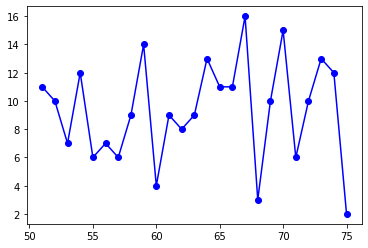

In [7]:
#count of age above 50
df1 = df[df['age']>50].groupby('age') ['age'].count()
plt.plot(df1,'o-b')

([<matplotlib.patches.Wedge at 0x7fbc99710e20>,
 [Text(0.9038057032802717, 0.6270049846038337, ''),
  Text(-0.3781781751998188, 1.0329478533800898, ''),
  Text(-1.0907920929717487, 0.14203031335004543, ''),
  Text(-1.0180511794687541, -0.4166194858408318, ''),
  Text(-0.5478345897544542, -0.9538748671962004, ''),
  Text(0.27805810555274757, -1.0642761342510774, ''),
  Text(0.9482251229120686, -0.5575563794616581, '')])

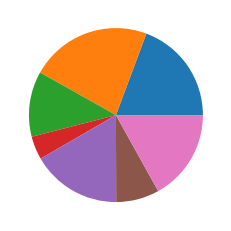

In [8]:
df2 = df.groupby('location') ['location'].count()
plt.pie(df2)

([<matplotlib.patches.Wedge at 0x7fbc996e5f40>,
 [Text(0.9038057032802717, 0.6270049846038337, 'africa'),
  Text(-0.3781781751998188, 1.0329478533800898, 'australia'),
  Text(-1.0907920929717487, 0.14203031335004543, 'china'),
  Text(-1.0180511794687541, -0.4166194858408318, 'india'),
  Text(-0.5478345897544542, -0.9538748671962004, 'ireland'),
  Text(0.27805810555274757, -1.0642761342510774, 'uk'),
  Text(0.9482251229120686, -0.5575563794616581, 'us')],
 [Text(0.4929849290619663, 0.3420027188748183, '19.3%'),
  Text(-0.20627900465444657, 0.5634261018436852, '22.6%'),
  Text(-0.5949775052573174, 0.07747108000911568, '12.1%'),
  Text(-0.555300643346593, -0.22724699227681733, '4.3%'),
  Text(-0.2988188671387932, -0.5202953821070183, '16.7%'),
  Text(0.1516680575742259, -0.5805142550460421, '8.0%'),
  Text(0.5172137034065828, -0.30412166152454073, '16.9%')])

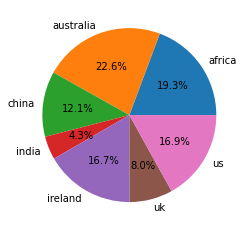

In [9]:
plt.pie(df2,labels=df2.index,autopct='%1.1f%%')

In [10]:
print(df2)

location
africa        89
australia    104
china         56
india         20
ireland       77
uk            37
us            78
Name: location, dtype: int64


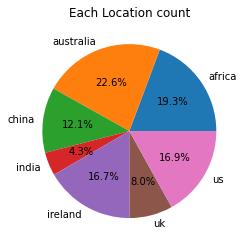

In [11]:
pivot_table = df.pivot_table(index='location', aggfunc= 'size')

plt.pie(pivot_table, labels=pivot_table.index, autopct='%1.1f%%')
plt.title('Each Location count')
plt.show()


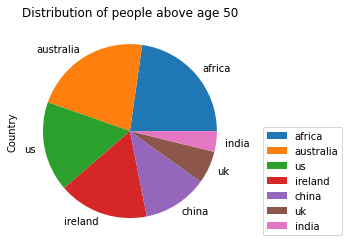

In [12]:
age_50 = df.loc[(df['age']>50)][['location']]
counts = age_50['location'].value_counts()
percent = counts/sum(counts)

ax =age_50['location'].value_counts().plot.pie()

ax.set_ylabel("Country")
ax.legend(labels=percent.map('{:.2f}%'.format),title="Percentage")
plt.legend(bbox_to_anchor=(1.5,0), loc="lower right")
plt.title('Distribution of people above age 50')
plt.show()

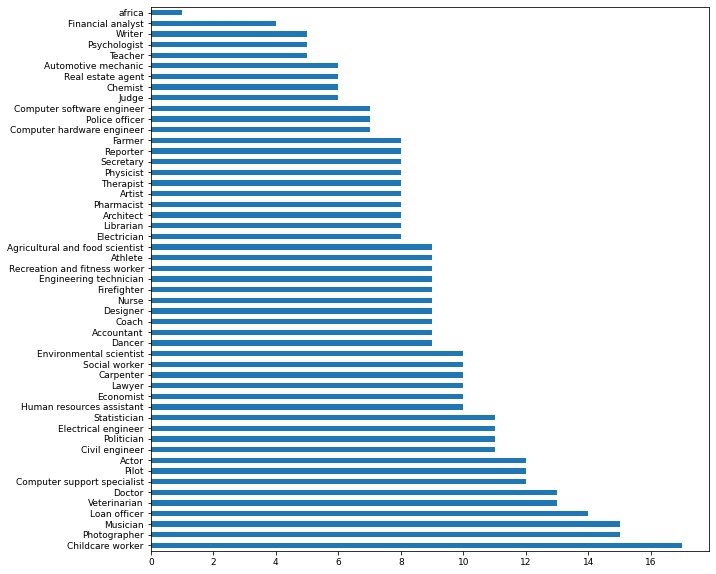

In [13]:
df3 = df['occupation'].value_counts().plot.barh(linewidth=200)
df3.figure.set_size_inches(10,10)
df3.tick_params(axis='both',labelsize=9)


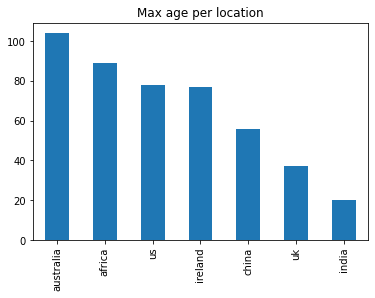

In [14]:
loc = df.sort_values('age', ascending=False)
ag = loc['location'].value_counts()

plt.title('Max age per location')

ag.plot.bar()



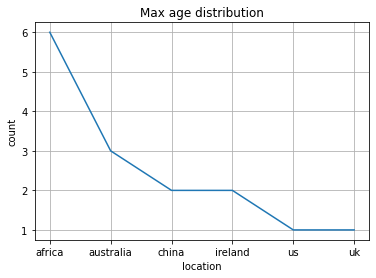

In [15]:
max=df.sort_values('age',ascending=False).head(15)
pcount=max['location'].value_counts()
plt.title('Max age distribution')
plt.xlabel('location')
plt.ylabel('count')
pcount.plot.line()
plt.grid()

Text(0.5, 0, 'age')

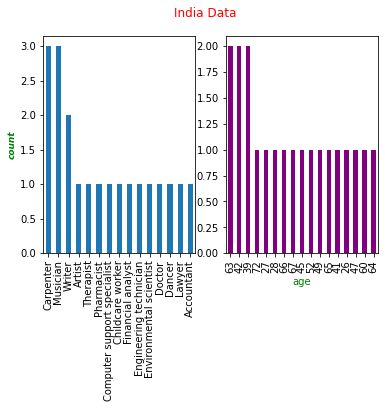

In [20]:

#India work details
ind = df.loc[df['location']=='india']
occu = ind['occupation'].value_counts()
plt.subplot(1,2,1)
plt.ylabel('count', color='g',size=9,weight='bold', style='italic')
plt.suptitle('India Data', color='r')
occu.plot.bar()

#age max count
age_max = ind['age'].value_counts()
plt.subplot(1,2,2)
age_max.plot.bar(color='purple')
plt.xlabel('age',color='g')


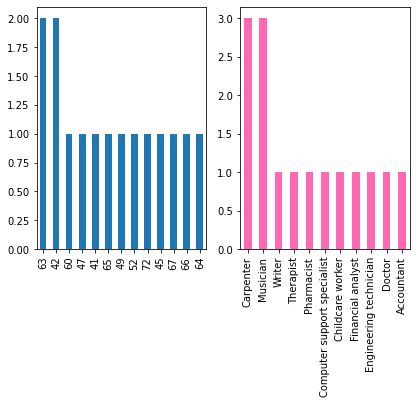

In [22]:
#age above 40
age_forty = ind.loc[(df['age']>40)]
age_for = age_forty['age'].value_counts()
plt.subplot(1,2,1)
plt.tight_layout()
age_for.plot.bar()

age_occu = age_forty['occupation'].value_counts()
plt.subplot(1,2,2)
plt.tight_layout()
age_occu.plot.bar(color='hotpink')